# 1. Разработайте скрипт Python, который создает визуализацию данных фондового рынка, используя данные из общедоступного API.

In [1]:
import requests
import matplotlib.pyplot as plt

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=GX7VY5CL1SMMU0M2'
r = requests.get(url)
data = r.json()

meta_data = data['Meta Data']
print("Meta Data:")
for key, value in meta_data.items():
    print(f"{key}: {value}")

time_series = data['Time Series (5min)']
print("\nTime Series (5min):")
for timestamp, values in time_series.items():
    print(f"Timestamp: {timestamp}")
    print("Values:")
    for key, value in values.items():
        print(f"{key}: {value}")
    print()


Meta Data:
1. Information: Intraday (5min) open, high, low, close prices and volume
2. Symbol: IBM
3. Last Refreshed: 2023-05-15 19:20:00
4. Interval: 5min
5. Output Size: Compact
6. Time Zone: US/Eastern

Time Series (5min):
Timestamp: 2023-05-15 19:20:00
Values:
1. open: 123.2500
2. high: 123.2500
3. low: 123.2500
4. close: 123.2500
5. volume: 100

Timestamp: 2023-05-15 18:40:00
Values:
1. open: 123.3600
2. high: 123.3600
3. low: 123.3600
4. close: 123.3600
5. volume: 206

Timestamp: 2023-05-15 18:00:00
Values:
1. open: 123.2500
2. high: 123.2500
3. low: 123.2500
4. close: 123.2500
5. volume: 200

Timestamp: 2023-05-15 17:30:00
Values:
1. open: 123.2700
2. high: 123.2700
3. low: 123.2700
4. close: 123.2700
5. volume: 100

Timestamp: 2023-05-15 16:15:00
Values:
1. open: 123.3600
2. high: 123.4200
3. low: 123.3600
4. close: 123.4200
5. volume: 1905

Timestamp: 2023-05-15 16:10:00
Values:
1. open: 123.4200
2. high: 123.4200
3. low: 123.3600
4. close: 123.3600
5. volume: 3143

Timestamp:

In [2]:
def get_stock_data():
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=GX7VY5CL1SMMU0M2'
    r = requests.get(url)
    data = r.json()
    return data['Time Series (5min)']

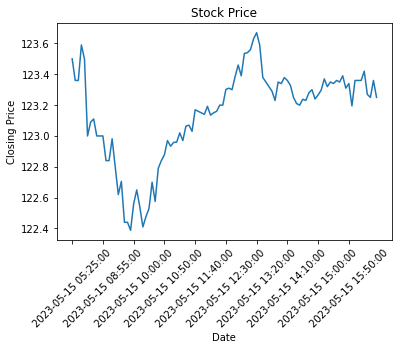

In [3]:
def visualize_stock_data(data):
    dates = list(data.keys())[::-1]
    prices = []
    for date in dates:
        if '4. close' in data[date]:
            try:
                price = float(data[date]['4. close'])
                prices.append(price)
            except ValueError:
                print(f"Invalid price data for date {date}. Skipping.")
        else:
            print(f"Closing price data for date {date} is not available. Skipping.")

    if not prices:
        print("No valid closing prices found. Unable to visualize data.")
        return

    plt.plot(dates, prices)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Stock Price')

    num_dates = len(dates)
    if num_dates > 10:
        step = num_dates // 10 
        plt.xticks(range(0, num_dates, step), [date for i, date in enumerate(dates) if i % step == 0], rotation=45)

    plt.show()
stock_data = get_stock_data()
visualize_stock_data(stock_data)